Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

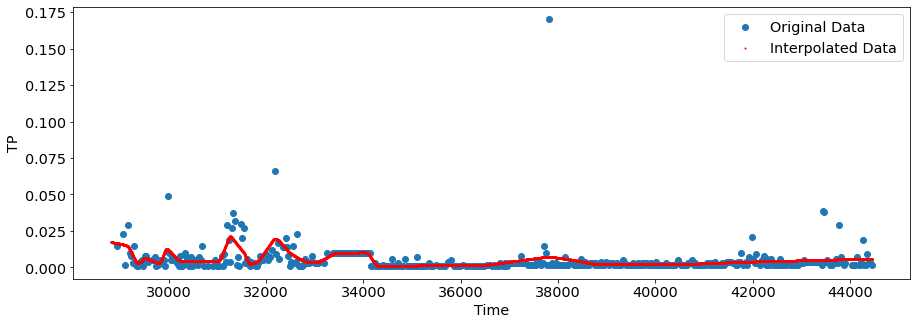

313/313 [==============================] - 0s 420us/step - loss: 2.8151e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB38_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB38.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 28934.49                      
time_max = 44454.35                          

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.421041612
,0.424843193
,0.42877364
,0.432704087
,0.436634535
,0.440564982
,0.444559863
,0.448361443
,0.452291891
,0.456222338
,0.460152785
,0.464083233
,0.468078114
,0.471879694
,0.475810141
,0.479740589
,0.483671036
,0.487601483
,0.491596364
,0.495462378
,0.503323273
,0.830774642
,0.966149559
,0.968082566
,0.970080006
])
interpolation

array([[0.00235266],
       [0.00239838],
       [0.00244565],
       [0.00249293],
       [0.0025402 ],
       [0.00258747],
       [0.00263551],
       [0.00268124],
       [0.00272851],
       [0.00277578],
       [0.00282305],
       [0.00287032],
       [0.00291837],
       [0.00296409],
       [0.00301137],
       [0.00305864],
       [0.00310631],
       [0.00410927],
       [0.00564696],
       [0.00713504],
       [0.0101649 ],
       [0.01707931],
       [0.02739421],
       [0.02754036],
       [0.02769139]], dtype=float32)